In [2]:
from astropy.io import fits# 加载科学包
from astropy import wcs
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from astropy.utils.data import get_pkg_data_filename
#from _mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [3]:
matplotlib.rc('xtick',labelsize=12)
matplotlib.rc('ytick',labelsize=12)
fi=plt.figure()
hdu=fits.open( 'frame-i-006354-4-0209.fits' ) # 打开文件
hdu.info() #查看文件信息
#print(hdu[0].header) #查看头文件信息 ？写想看的单元
print(hdu[1].data[:][:]) #查看i行j列数据
#hdu[1].data.field(‘time’) #查看time 的数据
#hdu[1].data.names #查看数据名字
#hdu['LIGHTCURVE'].data['TIME'] #直接访问数据
#print(hdu[0].data)
#x = np.arange(1, 2046, 1)
#y = np.arange(1, 1489, 1)

#plt.scatter(x,y,hdu[0].data[x][y])
#plt.plot(y,hdu[0].data[y])
#ax=fi.gca(projection='3d')
#ax.scatter(x,y,hdu[0].data[x][y])
#print(hdu[0].data[1][10])

hdu[0].header #查看头文件信息 ？写想看的单元



Filename: frame-i-006354-4-0209.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   
[0.00628168 0.00628053 0.00627935 ... 0.00629617 0.00629673 0.00629729]


SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4665102984.04 / 1st row Number of seconds since Nov 17 1858    
RA      =            349.32333 / 1st row RA of telescope boresight (deg)        
DEC     =            18.880897 / 1st row Dec of telescope boresight (degrees)   
SPA     =             152.933  / 1st row Cam col position angle wrt N (deg)     
IPA     =             187.02

<Figure size 640x480 with 0 Axes>

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 349.74760228  18.7825411901  
CRPIX : 1025.0  745.0  
CD1_1 CD1_2  : 9.80267090343e-05  4.98019002971e-05  
CD2_1 CD2_2  : 4.98478659566e-05  -9.80660158765e-05  
NAXIS : 2048  1489


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


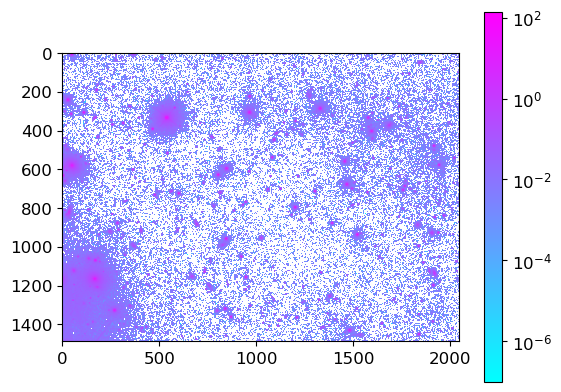

In [4]:
w = wcs.WCS(hdu[0].header)
data=hdu[0].data
print(w)
type(w)
#plt.figure(figsize=(8,6))
#plt.subplot(projection=w)
#im = plt.imshow(data,cmap='CMRmap')

image_file = fits.open('frame-i-006354-4-0209.fits')
plt.figure()
plt.imshow(image_file[0].data,norm='log',cmap='cool')
#vmin=np.percentile(im,5),vmax=np.percentile(im,95),
plt.colorbar()
plt.savefig('2_1',format='png',dpi=300)
#data[1:30][1:30]
#data.mean()
#im = plt.imshow(data,cmap='CMRmap')

#plt.colorbar(im)
#plt.xlabel('Right Ascension')
#plt.ylabel('Declination')

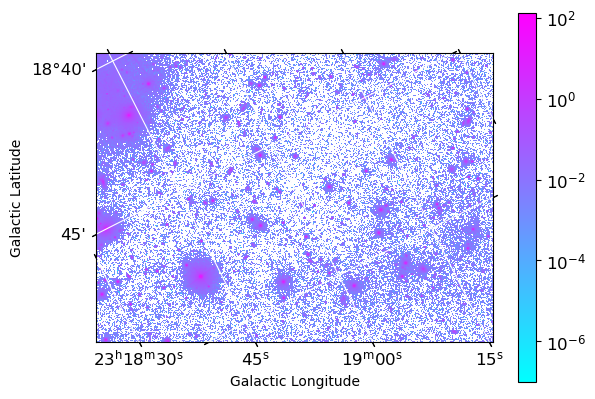

In [5]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
wcs = WCS(image_file[0].header)

plt.subplot(projection=wcs,label='overlays')
plt.imshow(image_file[0].data,norm='log',cmap='cool')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

plt.colorbar()
plt.savefig('2_2',format='png',dpi=300)

<class 'module'>
<module 'matplotlib.pyplot' from '/home/sralus/.conda/envs/astrostatistics/lib/python3.11/site-packages/matplotlib/pyplot.py'>
42.875
(56, 57)


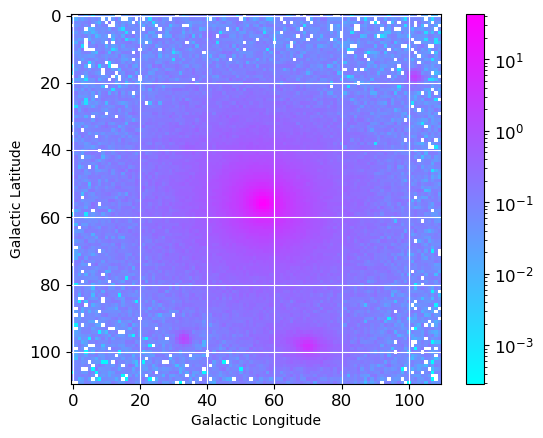

In [6]:
img=image_file[0].data[1112:1222,112:222]
print(type(plt))
print(plt)

plt.imshow(img,norm='log',cmap='cool')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

plt.colorbar()
plt.savefig('2_3',format='png',dpi=300)
print(np.max(img))
max_index = np.argmax(img)
print(np.unravel_index(max_index,img.shape))

AttributeError: AxesImage.set() got an unexpected keyword argument 'interppolation'

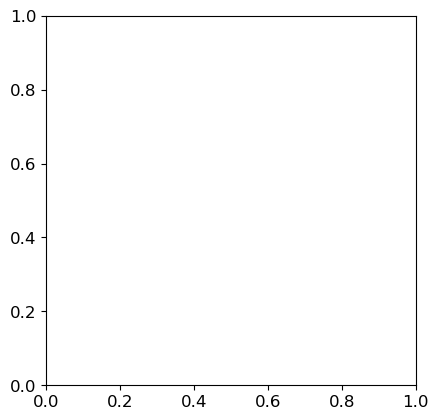

In [8]:
plt.imshow(img,norm='log',interppolation='nearext',cmap='gray')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

plt.colorbar()